# Librerias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import joblib 

# Lectura

In [2]:
df = pd.read_csv("Data/churn.csv")

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [5]:
ls_fail= []
for index, row in df.iterrows():
    total= row["TotalCharges"]
    
    try:
        float(total)
    except :
        ls_fail.append(index)

In [6]:
df.drop(ls_fail, inplace=True)

In [7]:
df['TotalCharges']= df['TotalCharges'].apply(lambda x: float(x))

# EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

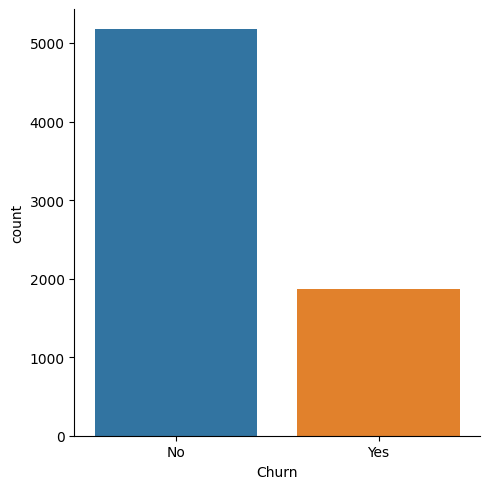

In [8]:
sns.catplot(x = 'Churn', kind = 'count', data = df)

# Preprocesamiento

In [12]:
sc = StandardScaler()

num_d = df.select_dtypes(exclude=['object'])

In [13]:
num_d.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [14]:
num_d = num_d.drop(columns = ['SeniorCitizen'])

In [15]:
df[num_d.columns] = sc.fit_transform(num_d)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,-1.280248,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,-1.161694,-0.994194,No
1,5575-GNVDE,Male,0,No,No,0.064303,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.260878,-0.173740,No
2,3668-QPYBK,Male,0,No,No,-1.239504,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.363923,-0.959649,Yes
3,7795-CFOCW,Male,0,No,No,0.512486,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.747850,-0.195248,No
4,9237-HQITU,Female,0,No,No,-1.239504,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.196178,-0.940457,Yes


In [17]:
cat_d = df.select_dtypes(exclude=["float64","int64"])

In [18]:
cat_d = cat_d.drop(columns = ["Churn"])

In [19]:
cat_d

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [20]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [21]:
f = cat_d.columns
encoder = LabelEncoder()
df[f] = encoder.fit_transform(f)

In [22]:
f

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,14,15,0,8,1,-1.277445,10,4,3,6,...,2,13,12,11,0,7,9,-1.160323,-0.994194,0
1,14,15,0,8,1,0.066327,10,4,3,6,...,2,13,12,11,0,7,9,-0.259629,-0.173740,0
2,14,15,0,8,1,-1.236724,10,4,3,6,...,2,13,12,11,0,7,9,-0.362660,-0.959649,1
3,14,15,0,8,1,0.514251,10,4,3,6,...,2,13,12,11,0,7,9,-0.746535,-0.195248,0
4,14,15,0,8,1,-1.236724,10,4,3,6,...,2,13,12,11,0,7,9,0.197365,-0.940457,1


In [19]:
df = df.dropna()

In [20]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
clasificadores = [LogisticRegression(), SGDClassifier(), RandomForestClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]

In [22]:
def fit_class(clasificador,X_train, y_train, X_test, y_test):
    model_fit = clasificador.fit(X_train, y_train)
    y_pred = model_fit.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Acurracy Score: {0:.2f}%".format(accuracy*100))
    print()
    return accuracy

In [23]:
result = []
for c in clasificadores:
    print("Resesultados para {}".format(c))
    clf_acc = fit_class(c, X_train, y_train, X_test,y_test)
    result.append(clf_acc)

Resesultados para LogisticRegression()
Acurracy Score: 78.39%

Resesultados para SGDClassifier()
Acurracy Score: 73.77%

Resesultados para RandomForestClassifier()
Acurracy Score: 75.69%

Resesultados para KNeighborsClassifier()
Acurracy Score: 76.40%

Resesultados para DecisionTreeClassifier()
Acurracy Score: 70.01%



In [24]:
clf = LogisticRegression()
model_fit = clf.fit(X_train, y_train)
y_pred = model_fit.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurracy Score: {0:.2f}%".format(accuracy*100))

Acurracy Score: 78.39%


In [26]:
y_pred = clf.predict(X_test)

In [29]:
joblib.dump(clf ,'modelo_entrenado.pkl')

['modelo_entrenado.pkl']